In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [ ]:
df = pd.read_csv('climate_data.csv')
df = df.dropna()

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.shape

(372151, 12)

In [5]:
df['year'] = df['date'].dt.year

In [6]:
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,year
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,2010
1,2010-02-01,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,2010
2,2010-03-01,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,2010
3,2010-04-01,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,2010
7,2010-08-01,21.8,29.8,26.8,91.0,3.0,0.6,5.0,90.0,4.0,E,96001,2010


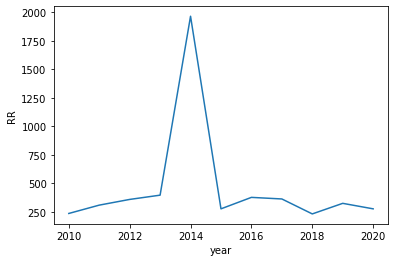

In [7]:
year_rr = df.groupby(['year'])['RR'].max().reset_index()
sns.lineplot(data=year_rr, x="year", y="RR")

In [8]:
station_df = pd.read_csv('station_detail.csv')

In [9]:
station_df.head()

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1


In [10]:
station_df.groupby(['region_name'])['station_id'].count().reset_index().sort_values(by='station_id', ascending=False)

,region_name,station_id
110,Kota Ambon,3
126,Kota Kupang,3
143,Kota Sorong,3
141,Kota Semarang,3
135,Kota Palu,3
23,Kab. Deli Serdang,3
1,Kab. Aceh Besar,3
96,Kab. Sleman,2
82,Kab. Padang Pariaman,2
80,Kab. Nunukan,2


In [11]:
import pandas as pd

climate_df = pd.read_csv('climate_data.csv')

climate_df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [12]:
climate_df.rename(columns={'date': 'event_date'})

,event_date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001
5,06-01-2010,21.2,30.0,26.1,93.0,11.0,0.3,NaN,NaN,NaN,NaN,96001
6,07-01-2010,21.4,29.0,25.4,96.0,2.0,0.1,NaN,NaN,NaN,NaN,96001
7,08-01-2010,21.8,29.8,26.8,91.0,3.0,0.6,5.0,90.0,4.0,E,96001
8,09-01-2010,21.8,30.2,26.7,92.0,3.0,0.7,4.0,90.0,3.0,E,96001
9,10-01-2010,20.0,30.2,27.1,88.0,28.0,0.6,5.0,90.0,4.0,E,96001


In [13]:
rename(columns={'date': 'event_date'})

NameError: name 'rename' is not defined

In [ ]:
{'date':'event_date'}

{'date': 'event_date'}

In [ ]:


name_dict = {'FirstName': 'Sarah', 'LastName': 'Kim'}
name_list = ['Sarah', 'Kim']
name_set = ('Sarah', 'Kim')
I love you Fausto - Sarah DaeunKim Rodriguez <3